<a href="https://colab.research.google.com/github/byu-cce270/content/blob/main/docs/unit3/05_pandas_part2/in_class_pandaspart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Date Time Data
Pandas part 2 In Class assignment.

We will create some datatime data, add columns for the months and days, add data, then plot it.

# Naming
You don't have to do it, but it is common to use varilables with an _df for pandas data frames. FOr example:

`date_df` for a data frame with dates.
`accidents_df` for a data frame with accidents, etc.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [57]:
# create 10 years of  Pandas daily  data from using a data rannge
date_rng = pd.date_range(start='1/1/2010', end='1/1/2020', freq='D')

# now make a dataframe using the date_rng as index

## You need to add comments to the following lines telling what each line does.
## Tell what each part of the command is for

# Add your comment here
date_df = pd.DataFrame(date_rng, columns=['date'])

# Add you comment here
date_df['date'] = pd.to_datetime(date_df['date'])

# Add your comment here
date_df.set_index('date', inplace=True)


# Now lets add some columns

In [58]:
# Now add a columns for the Year, the Month, and the Day the dataframe

# Add your comment here
date_df['year'] = date_df.index.year


# Add your comment here
date_df['month'] = date_df.index.month

# Add your comment here about what `day` means
date_df['day'] = date_df.index.day


# Now add some other columns
# what does this do
date_df['day_of_the_year'] = date_df.index.dayofyear


date_df['day_of_the_week'] = date_df.index.day_name()


date_df['month_name'] = date_df.index.month_name()

# this works a little bit differently
date_df['week']=date_df.index.isocalendar().week

# Explore your data frame
    Print the top 10 lines
    Print the bottom 10 lines
    Print how many rows are in the data frame
    Print the name of the columns in the data frame
    Use the .describe() method

In [60]:
# to get you started
print(date_df.head(10))


            year  month  day  day_of_the_year day_of_the_week month_name  week
date                                                                          
2010-01-01  2010      1    1                1          Friday    January    53
2010-01-02  2010      1    2                2        Saturday    January    53
2010-01-03  2010      1    3                3          Sunday    January    53
2010-01-04  2010      1    4                4          Monday    January     1
2010-01-05  2010      1    5                5         Tuesday    January     1
2010-01-06  2010      1    6                6       Wednesday    January     1
2010-01-07  2010      1    7                7        Thursday    January     1
2010-01-08  2010      1    8                8          Friday    January     1
2010-01-09  2010      1    9                9        Saturday    January     1
2010-01-10  2010      1   10               10          Sunday    January     1


# Add some data
We will use the numpy random number functions to generate data.

We will use the numpy sin and cos functions to make it vary annually.


            year  month  day  day_of_the_year day_of_the_week month_name  \
date                                                                       
2010-01-01  2010      1    1                1          Friday    January   
2010-01-02  2010      1    2                2        Saturday    January   
2010-01-03  2010      1    3                3          Sunday    January   
2010-01-04  2010      1    4                4          Monday    January   
2010-01-05  2010      1    5                5         Tuesday    January   

            week       data   uniform   radians  
date                                             
2010-01-01    53  13.902565  1.865215  0.017214  
2010-01-02    53  19.395942  4.525863  0.034428  
2010-01-03    53  11.351448  0.417626  0.051643  
2010-01-04     1  17.805403  3.558689  0.068857  
2010-01-05     1  14.577666  1.859009  0.086071  


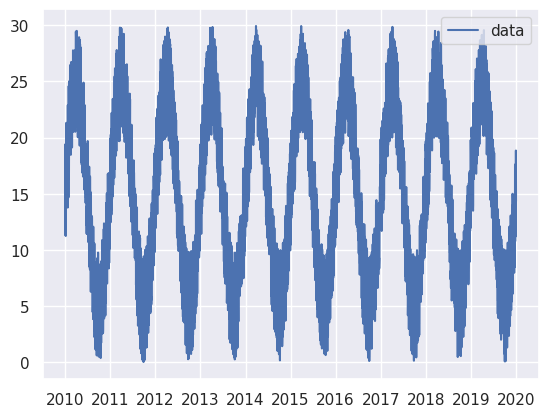

            year  month  day  day_of_the_year day_of_the_week month_name  \
date                                                                       
2010-01-01  2010      1    1                1          Friday    January   
2010-01-02  2010      1    2                2        Saturday    January   
2010-01-03  2010      1    3                3          Sunday    January   
2010-01-04  2010      1    4                4          Monday    January   
2010-01-05  2010      1    5                5         Tuesday    January   

            week       data  
date                         
2010-01-01    53  13.902565  
2010-01-02    53  19.395942  
2010-01-03    53  11.351448  
2010-01-04     1  17.805403  
2010-01-05     1  14.577666  


In [65]:
from datetime import date
# add a column of uniform random data from 0 to 5 that has an annual frequency
date_df['uniform'] = np.random.uniform(0, 5, len(date_df))

# use the day_of_the_year column to generate a column from 1 to 2-pi radians
date_df['radians'] = date_df['day_of_the_year'] * (2 * np.pi / 365)
date_df['data'] = (np.sin(date_df['radians'])+1)*10 +date_df['uniform']*2

print(date_df.head(5))
# plot the uniform and radian columns against the date
plt.plot(date_df.index, date_df['data'], label='data')

plt.legend()
plt.show()

# drop the columns 'radians' and 'uniform' as we don't need them anymore
date_df.drop(['radians', 'uniform'], axis=1, inplace=True)

print(date_df.head(5))

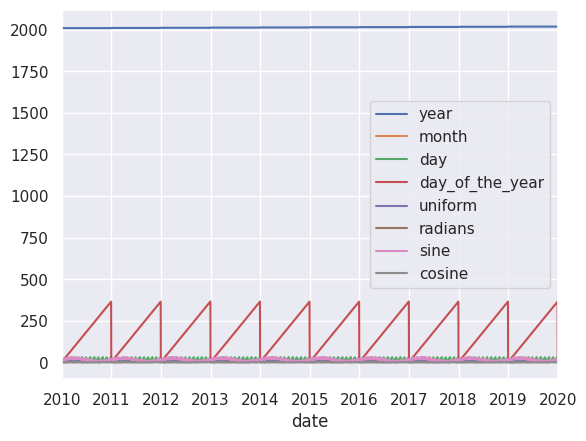

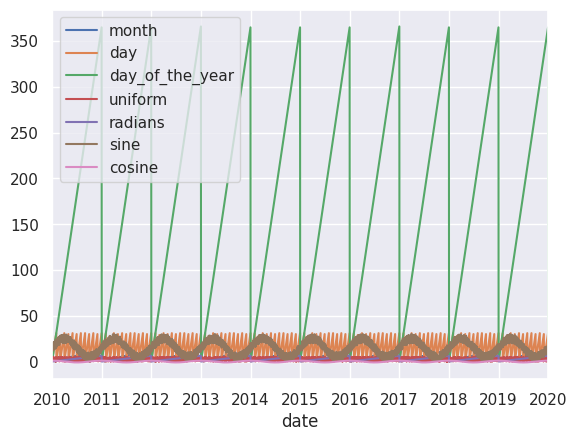

In [40]:
# use the builtin pandas plot routine
date_df.plot()
plt.show()

# drop the  year column because of the scale
date_df.drop('year', axis=1).plot()
plt.show()

# Grouping
We can now look at means, counts (not interesting for these data), std dev, etc for different time groups.

month_name
April        24.880297
August        7.861873
December     12.474797
February     21.895866
January      17.886465
July         12.311130
June         17.810653
March        24.427148
May          22.150578
November      7.943049
October       5.438777
September     5.051450
Name: data, dtype: float64


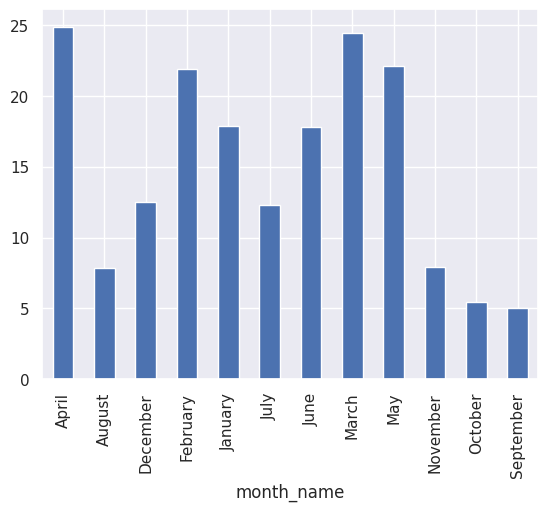

In [47]:
# find the avereage of the 'data' column in each month
monthly_avg = date_df.groupby('month_name')['data'].mean()
print(monthly_avg)

monthly_avg.plot(kind='bar')
plt.show()

# now do it by month number to get things in the correct order

# enter your code here

In [ ]:
# do the same thing for the weeks of the year.



# Accident Data
Now we will start to look at the accident data in the Excel
Spreadsheet

In [ ]:
# read the data into a pandas data frame called accidents_df

